In [1]:
import warnings

warnings.filterwarnings("ignore")

# Meet the Transformers

The initial success of the early transformer models triggered a Cambrian explosion in model development as researchers tried to improve on the original transformer architecture. The result is a zoo of transformer models, each with its own strengths and weaknesses.

The original Transformer is based on the *encoder-decoder* architecture. The encoder converts an input sequence of tokens into a sequence of embedding vectors (*hidden state* or *context*) and the decoder generates a sequence of output tokens from the encoder's output.

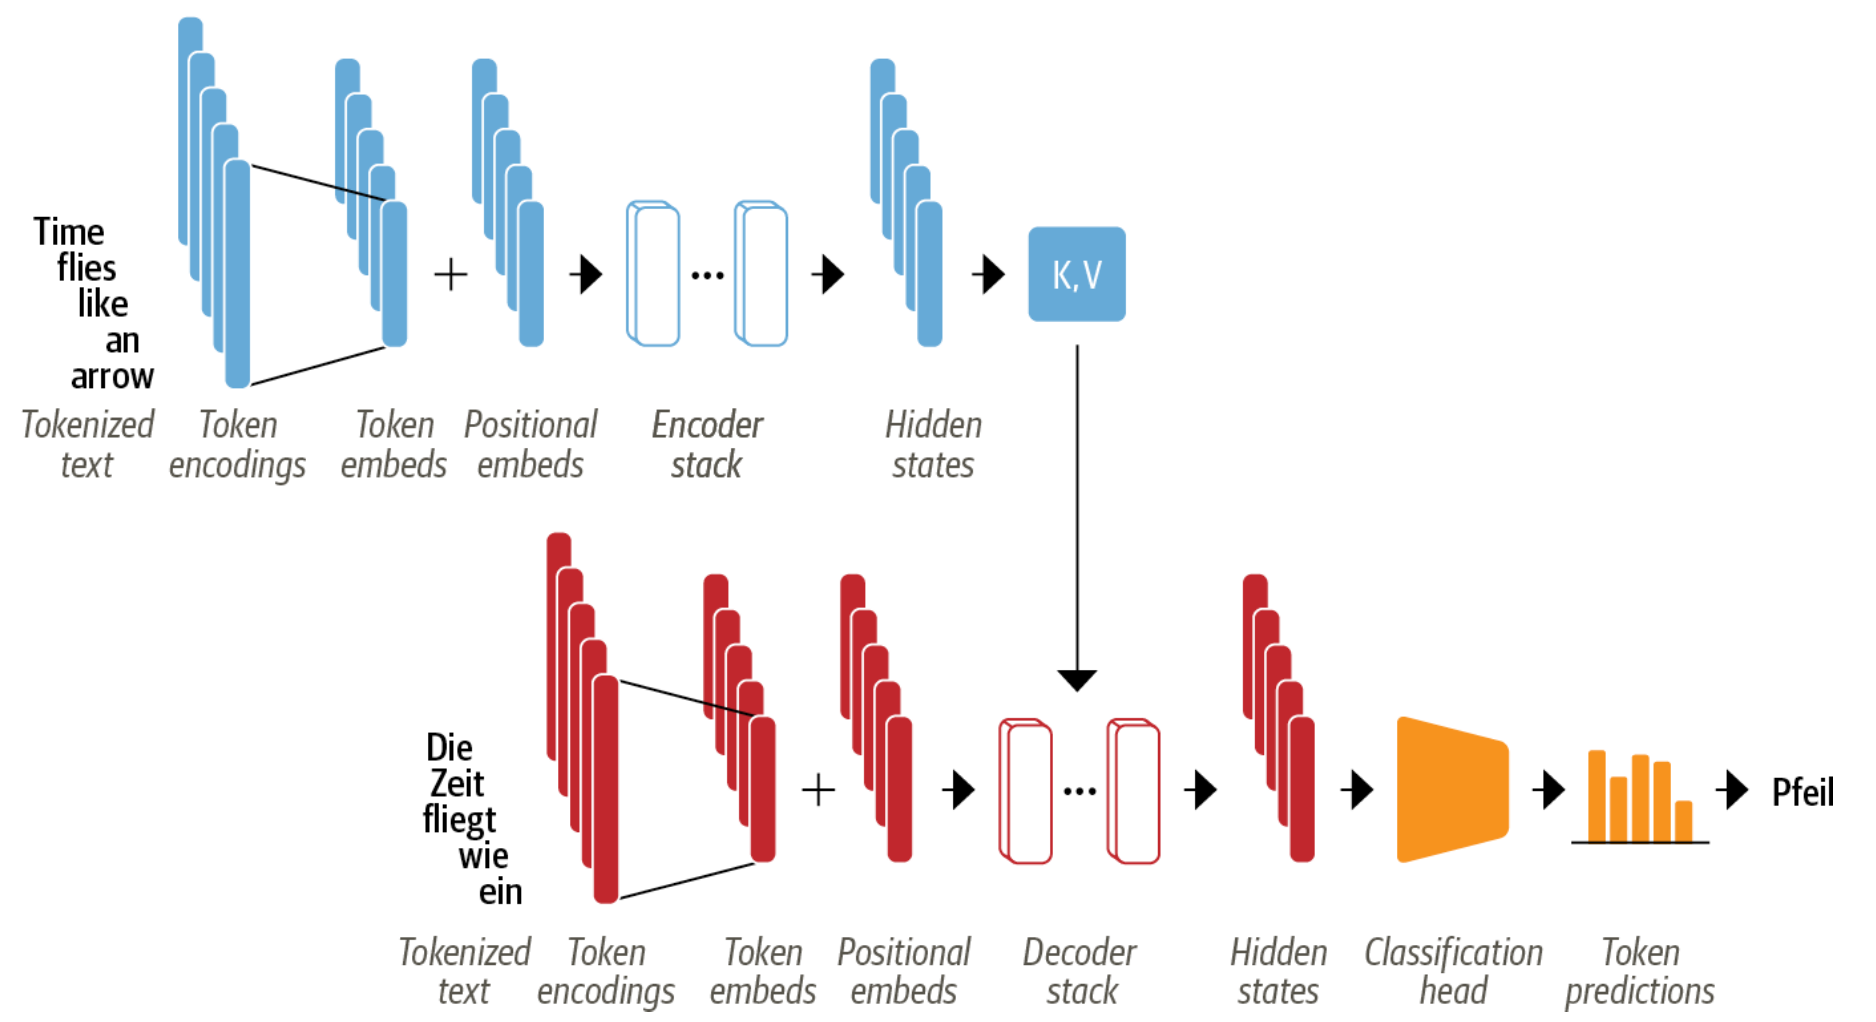

The Transformer architecture was originally designed for sequence-to-sequence tasks like machine translation, but both the encoder and decoder blocks have since been adapted as standalone models for other tasks, giving rise to three main transformer architectures: the encoder, the decoder, and the encoder-decoder.

## The Transformer Tree of Life

Over time, each of the three main architectures has undergone an evolution of its own.

1. *Encoder-only*: these models convert an input sequence of text into a numerical representation suited for tasks like text classification, named entity recognition, and question answering. The representation computed for a given token is *bidirectional attention* and depends both on the left (before the token) and the right (after the token) contexts. The original encoder-only transformer is called BERT (Bidirectional Encoder Representations from Transformers) and was introduced in 2018 by Jacob Devlin et al. at Google.

2. *Decoder-only*: these models generate a sequence of tokens from a given input sequence. The representation computed for a given token is *autoregressive attention (or causal)* and depends only on the left context. The original decoder-only transformer is called GPT (Generative Pre-trained Transformer) and was introduced in 2018 by Alec Radford et al. at OpenAI.

3. *Encoder-decoder*: these models are used for modeling complex mappings from one sequence of text to another like machine translation and summarization. The encoder converts an input sequence of tokens into a sequence of embedding vectors (*hidden state* or *context*) and the decoder generates a sequence of output tokens from the encoder's output. This is the original transformer architecture introduced in 2017 by Ashish Vaswani et al. at Google.

**NOTE**: In reality, the distinction between applications for different architectures is not so clear-cut.

## Taxonomy of Transformer Models

# 1. The Attention Mechanism in a Nutshell

The attention mechanism is the key to the transformer's success. It allows the model to focus on the relevant parts of the input sequence when computing the representation for a given token. The attention mechanism is also the most complex part of the transformer architecture.

Each encoder layer receives a sequence of embeddings and feeds them through the following sublayers:

* a multi-head **self-attention** layer
* a fully connected **feed-forward** layer (FFN) that is applied to each input embedding

The output embeddings of each sublayer have the same size as the input sequence and the main role of the encoder stack is to "update" the input embeddings to produce representations that encode some contextual information in the sequence.

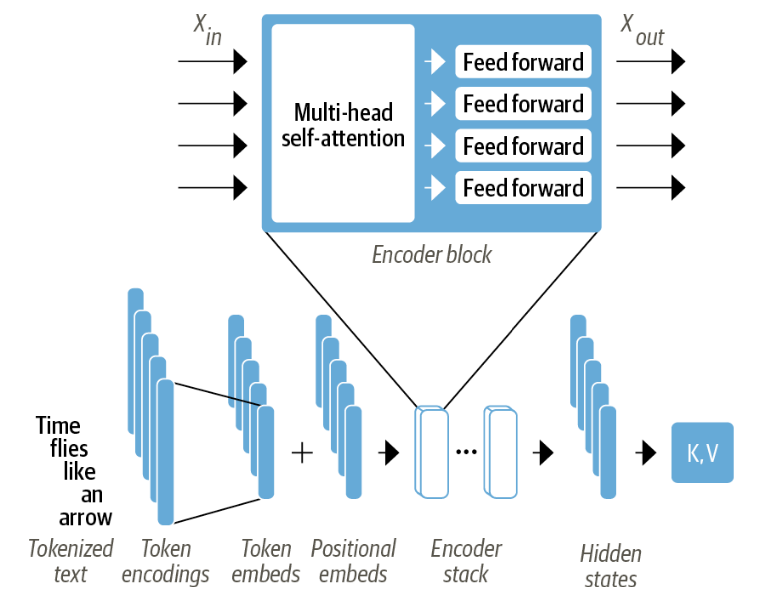

## 1.1. The Self-Attention Layer

Attention is a mechanism that allows neural networks to assign different weights (or *attention*) to each element in a sequence. For text sequences, the elements are *token embeddings* where each token is mapped to a vector. The **"self"** part refers to the fact that these weights are computed for all hidden states of the encoder.

The main idea behind self-attention is that instead of using a fixed embedding for each token, we can use the whole sequence to compute a *weighted average* of each embedding. It updates raw token embeddings into *contextualized embeddings* to create representations that incorporate information from the whole sequence.

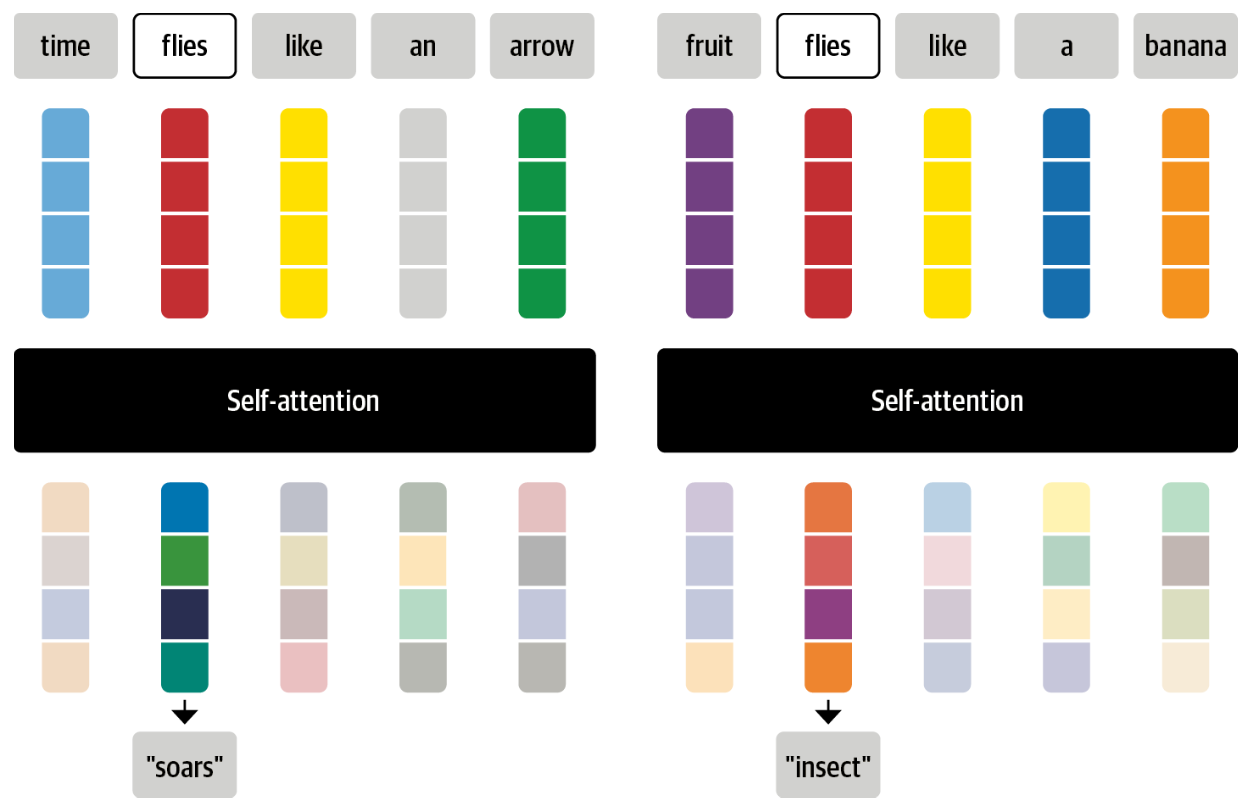

Given a sequence of token embeddings, self-attention produces a sequence of *contextualized embeddings* where each is a linear combination of all the initial embeddings. These new embeddings are normalized by *attention weights* and try to incorporate the contextual information by creating a representation that combines all the initial embeddings in different proportions.

## 1.2. Self-Attention Implementation

The self-attention layer is implemented as a matrix multiplication between the input embeddings and three weight matrices: *query*, *key*, and *value*. The output of the self-attention layer is a sequence of *contextualized embeddings* that are a linear combination of the input embeddings. This method is called *scaled dot-product attention* and is the most common implementation of self-attention.

Steps for computing the self-attention layer:

1. Compute the *query*, *key*, and *value* matrices by multiplying the input embeddings by the corresponding weight matrices.

2. Compute the *attention scores* by taking the dot product between the *query* and *key* matrices (*similarity function*). Queries and keys that are similar will have higher scores, while those that are different will have little to no overlap. For a sequence with `n` input tokens there will be a corresponding `n x n` matrix of attention scores.

3. Compute the *attention weights* by normalizing the attention scores with a softmax after multiplying them by a scaling factor (e.g. the square root of the dimension of the key vectors). This is done to prevent the scores from growing too large.

4. Compute the *contextualized embeddings* by multiplying the *attention weights* by the *value* matrix. The *contextualized embeddings* are a weighted average of the input embeddings where the weights are given by the *attention weights*.

In [2]:
from transformers import AutoTokenizer, AutoModel

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt, output_attentions=True)

In [3]:
text = "Time flies like an arrow."
inputs = tokenizer.encode(text, return_tensors='pt')
tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 

inputs, tokens

(tensor([[  101,  2051, 10029,  2066,  2019,  8612,  1012,   102]]),
 ['[CLS]', 'time', 'flies', 'like', 'an', 'arrow', '.', '[SEP]'])

In [16]:
# Output includes attention weights when output_attentions=True
outputs = model(inputs)
for key in outputs.keys():
    print(key, outputs[key][0].shape)

last_hidden_state torch.Size([8, 768])
pooler_output torch.Size([768])
attentions torch.Size([1, 12, 8, 8])


In [19]:
attention = outputs[-1]
attention[0].shape

torch.Size([1, 12, 8, 8])

In [20]:
from bertviz import model_view

model_view(attention, tokens, include_layers=[0, 1, 2, 3], include_heads=[0, 1, 2, 3])

<IPython.core.display.Javascript object>

In [23]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

model_type = 'bert'
model_version = 'bert-base-uncased'
do_lower_case = True
sentence_a = "Time flies like an arrow"
bertModel = BertModel.from_pretrained(model_version, output_attentions=True)
bertTokenizer = BertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)
show(bertModel, model_type, bertTokenizer, sentence_a, layer=2, head=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. The Transformer Encoder

## 2.1. Token embeddings

The input text is encoded and converted to token embeddings.

## 2.2. Positional embeddings

Since the attention mechanism is *permutation equivariant*, meaning that it is not aware of the relative positions of the tokens, the transformer needs to inject information about token positions into the input to model the sequential nature of text. This is done by adding a *positional embedding* to each token embedding.

## 2.3. Encoder stack

Composed of a stack of "blocks", which is analogous to stacking convolutional layers in computer vision.

## 2.4. Hidden states

## 2.5. Keys and values

# 3. The Transformer Decoder

Architectural Differences Between the Transformer Encoder and Decoder

## 3.1. Token embeddings

## 3.2. Positional embeddings

## 3.3. Decoder stack

Composed of a stack of "blocks", which is analogous to stacking convolutional layers in computer vision. The encoder's output is fed to each decoder layer, and the decoder then generates a prediction for the most probable next token in the sequence. This output is then fed back into the decoder to generate the next token and so on until a special end-of-sequence (EOS) token is generated or the maximum sequence length is reached.

## 3.4. Hidden states

## 3.5. Classification head

## 3.6. Token predictions

# Building a transformer from scratch

## Encoder

In [ ]:
inputs = tokenizer(text, return_tensors='pt', add_special_tokens=False)
text, inputs.input_ids

In [ ]:
from torch import nn
from transformers import AutoConfig

config = AutoConfig.from_pretrained(model_ckpt)
config.vocab_size, config.hidden_size

In [ ]:
token_emb = nn.Embedding(config.vocab_size, config.hidden_size)
token_emb

In [ ]:
inputs_embeds = token_emb(inputs.input_ids)
inputs_embeds.shape

In [ ]:
import torch
from math import sqrt

query = key = value = inputs_embeds
dim_k = key.size(-1)
dim_k

In [ ]:
scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
scores.shape

In [ ]:
import torch.nn.functional as F

weights = F.softmax(scores, dim=-1)
weights.shape

In [ ]:
weights.sum(dim=-1)

In [ ]:
attn_outputs = torch.bmm(weights, value)
attn_outputs.shape

In [ ]:
def scaled_dot_product_attn(query, key, value):
  dim_k = key.size(-1)
  scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
  weights = F.softmax(scores, dim=-1)
  return torch.bmm(weights, value)

### Multi-headed attention

In [ ]:
class AttentionHead(nn.Module):
  def __init__(self, embed_dim, head_dim):
    super().__init__()
    self.q = nn.Linear(embed_dim, head_dim)
    self.k = nn.Linear(embed_dim, head_dim)
    self.v = nn.Linear(embed_dim, head_dim)

  def forward(self, hidden_state):
    attn_outputs = scaled_dot_product_attn(self.q(hidden_state), 
                                            self.k(hidden_state), 
                                            self.v(hidden_state))
    return attn_outputs

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self, config):
    super().__init__()
    embed_dim = config.hidden_size
    num_heads = config.num_attention_heads
    head_dim = embed_dim // num_heads
    self.heads = nn.ModuleList([AttentionHead(embed_dim, head_dim) for _ in range(num_heads)])
    self.output_linear = nn.Linear(embed_dim, embed_dim)

  def forward(self, hidden_state):
    attn_outputs = torch.cat([h(hidden_state) for h in self.heads], dim=-1)
    return self.output_linear(attn_outputs)

In [ ]:
multihead_attn = MultiHeadAttention(config)
attn_output = multihead_attn(inputs_embeds)
attn_output.shape

In [ ]:
from bertviz import head_view

model = AutoModel.from_pretrained(model_ckpt, output_attentions=True)

sentence_a = "time flies like an arrow"
sentence_b = "fruit flies like a banana"

viz_inputs = tokenizer(sentence_a, sentence_b, return_tensors='pt')
attention = model(**viz_inputs).attentions
sentence_b_start = (viz_inputs.token_type_ids == 0).sum(dim=1)
tokens = tokenizer.convert_ids_to_tokens(viz_inputs.input_ids[0])

head_view(attention, tokens, sentence_b_start, heads=[8])

### The (position-wise) feed-forward layer

In [ ]:
class FeedForward(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.linear1 = nn.Linear(config.hidden_size, config.intermediate_size)
    self.linear2 = nn.Linear(config.intermediate_size, config.hidden_size)
    self.gelu = nn.GELU()
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, hidden_state):
    return self.dropout(self.linear2(self.gelu(self.linear1(hidden_state))))

In [ ]:
feed_forward = FeedForward(config)
ff_outputs = feed_forward(attn_output)
ff_outputs.shape

### Add layer normalization

In [ ]:
class TransformerEncoderLayer(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.layer_norm1 = nn.LayerNorm(config.hidden_size)
    self.layer_norm2 = nn.LayerNorm(config.hidden_size)
    self.attention = MultiHeadAttention(config)
    self.feed_forward = FeedForward(config)
    
  def forward(self, x):
    hidden_state = self.layer_norm1(x)
    x = x + self.attention(hidden_state)
    x = x + self.feed_forward(self.layer_norm2(x))
    return x

In [ ]:
encoder_layer = TransformerEncoderLayer(config)
inputs_embeds.shape, encoder_layer(inputs_embeds).shape

### Positional Embeddings

In [ ]:
class Embeddings(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.token_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)
    self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
    self.layer_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
    self.dropout = nn.Dropout()

  def forward(self, input_ids):
    seq_length = input_ids.size(1)
    position_ids = torch.arange(seq_length, dtype=torch.long).unsqueeze(dim=0)
    token_embeddings = self.token_embeddings(input_ids)
    position_embeddings = self.position_embeddings(position_ids)
    embeddings = token_embeddings + position_embeddings
    return self.dropout(self.layer_norm(embeddings))

In [ ]:
embedding_layer = Embeddings(config)
embedding_layer(inputs.input_ids).shape

### Full transformer encoder

In [ ]:
class TransformerEncoder(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.embeddings = Embeddings(config)
    self.layers = nn.ModuleList([TransformerEncoderLayer(config) for _ in range(config.num_hidden_layers)])

  def forward(self, x):
    x = self.embeddings(x)
    for layer in self.layers:
      x = layer(x)
    return x

In [ ]:
encoder = TransformerEncoder(config)
encoder(inputs.input_ids).shape

In [ ]:
inputs.input_ids, inputs.input_ids.shape

### Add Classification Head

In [ ]:
class TransformerForSequenceClassification(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.encoder = TransformerEncoder(config)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)

  def forward(self, x):
    x = self.encoder(x)[:, 0, :]  # select hidden state of [CLS] token
    x = self.dropout(x)
    return self.classifier(x)

In [ ]:
config.num_labels = 3
encoder_classifier = TransformerForSequenceClassification(config)
encoder_classifier(inputs.input_ids).shape

## Decoder

In [ ]:
seq_len = inputs.input_ids.size(-1)
mask = torch.tril(torch.ones(seq_len, seq_len)).unsqueeze(dim=0)
mask[0]

In [ ]:
scores.masked_fill(mask == 0, -float("inf"))

In [ ]:
def scaled_dot_product_attn(query, key, value, mask=None):
  dim_k = query.size(-1)
  scores = torch.bmm(query, key.transpose(1,2)) / sqrt(dim_k)
  if mask is not None:
    scores = scores.masked_fill(mask == 0, float("-inf"))
  weights = F.softmax(scores, dim=-1)
  return torch.bmm(weights, value)